In [152]:
# Importing libraries for data manipulation (pandas) and numerical operations (numpy),
# and loading the Tesla stock data from a CSV file into a pandas DataFrame.
import pandas as pd  
import numpy as np  
data = pd.read_csv("TESLA.csv")
data


,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,6/29/10,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,1,6/30/10,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2,7/1/10,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,3,7/2/10,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,4,7/6/10,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...,...
3632,3632,12/3/24,351.799988,355.690002,348.200012,351.420013,351.420013,58267200
3633,3633,12/4/24,353.000000,358.100006,348.600006,357.929993,357.929993,50810900
3634,3634,12/5/24,359.869995,375.429993,359.500000,369.489990,369.489990,81403600
3635,3635,12/6/24,377.420013,389.489990,370.799988,389.220001,389.220001,81455800


In [154]:
# Converting the 'Date' column to datetime format, setting it as the index, and dropping the unwanted column.
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y')  # Convert 'Date' to datetime format.
data.set_index('Date', inplace=True)  # Set the 'Date' column as the index of the DataFrame.
data = data.drop('Unnamed: 0', axis=1)  # Drop the unnecessary 'Unnamed: 0' column.

In [156]:
# Importing MinMaxScaler to scale data to the range (0,1) for preprocessing.
from sklearn.preprocessing import MinMaxScaler  

mmc = MinMaxScaler(feature_range=(0, 1))  # Initialize the scaler with the desired feature range.
scaled_data = mmc.fit_transform(data)  # Scale the data to the range (0, 1).

In [158]:
# Defining the time step parameter for creating sequences of data (e.g., for time-series analysis or modeling).
time_steps = 60

In [160]:
# Importing TensorFlow for building and training deep learning models.
import tensorflow as tf

In [162]:
# Importing TensorFlow and TimeseriesGenerator for creating time-series data sequences for model training.
import tensorflow
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator  

# Creating a time-series data generator with a sequence length of 'time_steps' and batch size of 32.
generator = TimeseriesGenerator(scaled_data, scaled_data, length=time_steps, batch_size=32)

In [164]:
# Splitting the scaled data into training (80%) and testing (20%) datasets.
train_size = int(len(scaled_data) * 0.8)  # Calculate the size of the training data (80% of the total data).
train_data = scaled_data[:train_size]  # Assign the first 80% of the data to the training set.
test_data = scaled_data[train_size:]  # Assign the remaining 20% to the testing set.

In [166]:
# Creating time-series data generators for training and testing datasets with a sequence length of 'time_steps' and batch size of 32.
train_generator = TimeseriesGenerator(train_data, train_data, length=time_steps, batch_size=32)  
test_generator = TimeseriesGenerator(test_data, test_data, length=time_steps, batch_size=32)

In [168]:
# Import necessary modules from TensorFlow Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input

# Initialize a Sequential model
model = Sequential()

# Add an input layer with specified shape (time_steps, 1)
# 'time_steps' represents the number of time steps in the input sequence
# The second dimension is 1, indicating that we are using univariate time series data
model.add(Input(shape=(time_steps, 1)))

# Add an LSTM layer with 50 units and ReLU activation function
# LSTM (Long Short-Term Memory) is suitable for sequence prediction problems
model.add(LSTM(50, activation='relu'))

# Add a Dense layer with 1 unit as the output layer
# This layer will output a single value, suitable for regression tasks
model.add(Dense(1))

In [174]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, input_shape=(time_steps, scaled_data.shape[1])),  # 50 units for LSTM layer
    tf.keras.layers.Dense(1)  # Output layer (1 value for prediction)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model with training data and validation data
model.fit(train_generator, epochs=50, validation_data=test_generator)


C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
89/90 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0822

C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - loss: 0.0809 - val_loss: 0.0301
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0046 - val_loss: 0.0299
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0068 - val_loss: 0.0301
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0053 - val_loss: 0.0302
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0036 - val_loss: 0.0296
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0075 - val_loss: 0.0296
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0043 - val_loss: 0.0297
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0045 - val_loss: 0.0351
Epoch 9/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0064 - val_loss: 0.0294
Epoch 10/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0046 - val_loss: 0.0296
Epoch 11/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0075 - val_loss: 0.0292
Epoch 12/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0045 - val_

In [175]:
print(train_generator[0][0].shape)  # Check the shape of input data (should be (batch_size, time_steps, features))
print(test_generator[0][0].shape)  # Same for test data

(32, 60, 6)
(32, 60, 6)


In [209]:
predictions=model.predict(test_generator)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [213]:
# Reshape predictions to match the number of features (6)
predictions_reshaped = np.repeat(predictions, scaled_data.shape[1], axis=1)

# Apply inverse transformation
predictions_rescaled = mmc.inverse_transform(predictions_reshaped)

In [229]:
# If predictions are single-feature, no reshaping required
predictions_rescaled = mmc.inverse_transform(predictions)

# Apply inverse transformation
y_test_actual_rescaled = mmc.inverse_transform(y_test_actual_reshaped)

ValueError: non-broadcastable output operand with shape (668,1) doesn't match the broadcast shape (668,6)

Text(0, 0.5, 'Stock Prices')

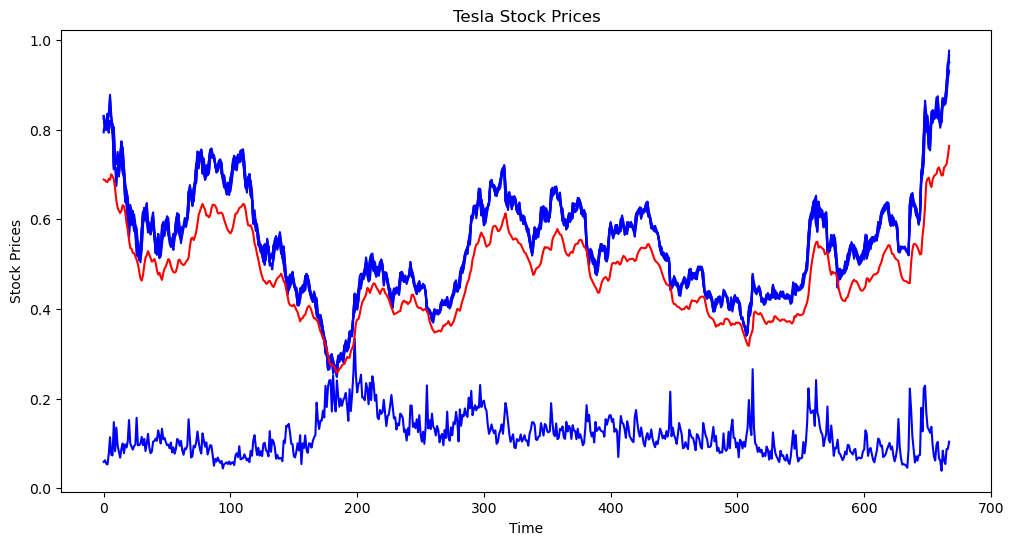

In [221]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(y_test_actual,color='blue',label='Actual Tesla Stock Prices')
plt.plot(predictions,color='red',label='Predicted Stock Prices')
plt.title('Tesla Stock Prices')
plt.xlabel('Time')
plt.ylabel("Stock Prices")

In [223]:
from sklearn.metrics import r2_score,mean_squared_error
accuracy=r2_score(predictions,y_test_actual)
mse=mean_squared_error(predictions,y_test_actual)
rmse=np.sqrt(mean_squared_error(predictions,y_test_actual))

ValueError: y_true and y_pred have different number of output (1!=6)

In [225]:
print("Accuracy : ",accuracy)
print("Mean Squared error : ",mse)
print("Root Mean Squared error : ",rmse)

Accuracy :  0.8885768266067982
Mean Squared error :  257.6216064723321
Root Mean Squared error :  16.050595206170147
